In [1]:
import os

runs_dir = '/home/gabi/diplomka/neurips/paper/regressors/'

In [4]:
import json

with open(os.path.join(runs_dir, 'run_497_features_model_orig_epoch-9.json'), 'rb') as f:
    res = json.load(f)
res.keys()

dict_keys(['regret_validation', 'regret_test', 'runtime'])

In [5]:
import pandas as pd

pd.DataFrame(res)

,regret_validation,regret_test,runtime
0,0.089877,0.086939,3.278185e+03
1,0.089877,0.086939,4.200537e+03
2,0.089877,0.086939,5.704944e+03
3,0.023771,0.020199,7.042099e+03
4,0.023771,0.020199,8.846069e+03
...,...,...,...
671,0.000000,0.000835,1.486738e+06
672,0.000000,0.000835,1.489803e+06
673,0.000000,0.000835,1.494939e+06
674,0.000000,0.000835,1.499573e+06


In [2]:
def process_one_run(file):
    with open(file, 'rb') as f:
        res = json.load(f)
        
    res_df = pd.DataFrame(res)
    res_df['name'] = os.path.basename(file).replace('.json', '')
    
    return res_df

In [3]:
import glob

info_9_runs = glob.glob(os.path.join(runs_dir, 'rf_*0_.json'))
info_9_dfs = [process_one_run(g) for g in info_9_runs]
info_9_dfs = pd.concat(info_9_dfs, axis=0)
info_9_dfs

NameError: name 'pd' is not defined

In [31]:
arch_9_runs = glob.glob(os.path.join(runs_dir, 'run_*_features_model_ref_epoch-9.json'))
arch_9_dfs = [process_one_run(g) for g in arch_9_runs]
arch_9_dfs = pd.concat(arch_9_dfs, axis=0)
arch_9_dfs

,regret_validation,regret_test,runtime,name
0,0.020199,0.018429,1.462185e+03,run_100_features_model_ref_epoch-9
1,0.020199,0.018429,3.019828e+03,run_100_features_model_ref_epoch-9
2,0.013822,0.013021,4.320425e+03,run_100_features_model_ref_epoch-9
3,0.013822,0.013021,6.614972e+03,run_100_features_model_ref_epoch-9
4,0.013822,0.013021,9.988819e+03,run_100_features_model_ref_epoch-9
...,...,...,...,...
527,0.000000,0.000835,1.489868e+06,run_295_features_model_ref_epoch-9
528,0.000000,0.000835,1.493906e+06,run_295_features_model_ref_epoch-9
529,0.000000,0.000835,1.496181e+06,run_295_features_model_ref_epoch-9
530,0.000000,0.000835,1.498772e+06,run_295_features_model_ref_epoch-9


In [28]:
rounded_run = info_9_dfs['runtime'].round(decimals=-3)
rounded_run[rounded_run == 2000]

1    2000.0
1    2000.0
0    2000.0
0    2000.0
0    2000.0
      ...  
1    2000.0
0    2000.0
1    2000.0
0    2000.0
0    2000.0
Name: runtime, Length: 284, dtype: float64

<IPython.core.display.Javascript object>


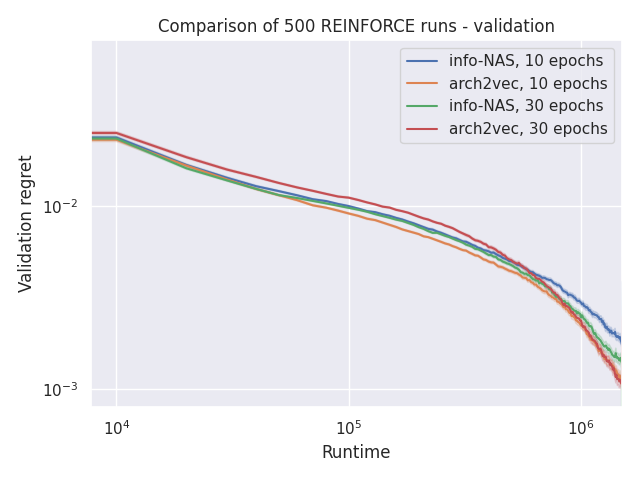

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

cutoff=False

sns.set()

info_9_dfs['rounded_runtime'] = info_9_dfs['runtime'].round(decimals=-4)
arch_9_dfs['rounded_runtime'] = arch_9_dfs['runtime'].round(decimals=-4)

plt.figure()
sns.lineplot(data=info_9_dfs, x='rounded_runtime', y='regret_validation',
             label='info-NAS, 10 epochs')
sns.lineplot(data=arch_9_dfs, x='rounded_runtime', y='regret_validation',
             label='arch2vec, 10 epochs')

sns.lineplot(data=info_29_dfs, x='rounded_runtime', y='regret_validation',
             label='info-NAS, 30 epochs')
sns.lineplot(data=arch_29_dfs, x='rounded_runtime', y='regret_validation',
             label='arch2vec, 30 epochs')

plt.xscale('log')
plt.yscale('log')
if cutoff:
    plt.xlim(left=5e5, right=1.5e6)
else:
    plt.xlim(right=1.5e6)

    
plt.xlabel('Runtime')
plt.ylabel('Validation regret')
plt.title(f"Comparison of 500 REINFORCE runs - validation{' (detail)' if cutoff else ''}")
plt.tight_layout()
plt.savefig(f'valid_reinf{"_cutoff" if cutoff else ""}.png')
plt.show()

<IPython.core.display.Javascript object>


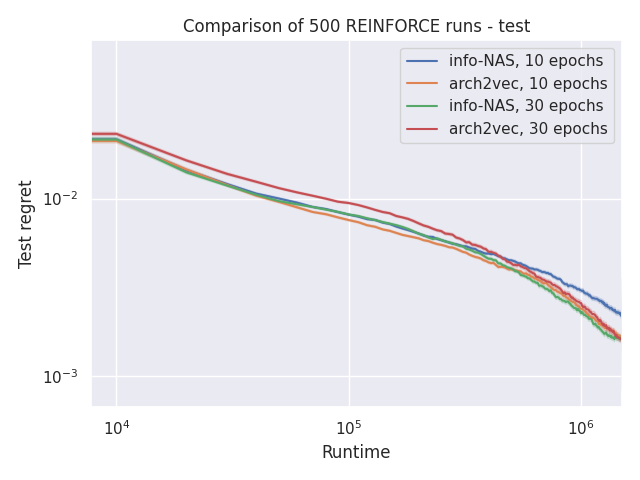

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

cutoff=False

sns.set()

info_9_dfs['rounded_runtime'] = info_9_dfs['runtime'].round(decimals=-4)
arch_9_dfs['rounded_runtime'] = arch_9_dfs['runtime'].round(decimals=-4)

plt.figure()
sns.lineplot(data=info_9_dfs, x='rounded_runtime', y='regret_test',
             label='info-NAS, 10 epochs')
sns.lineplot(data=arch_9_dfs, x='rounded_runtime', y='regret_test',
             label='arch2vec, 10 epochs')

sns.lineplot(data=info_29_dfs, x='rounded_runtime', y='regret_test',
             label='info-NAS, 30 epochs')
sns.lineplot(data=arch_29_dfs, x='rounded_runtime', y='regret_test',
             label='arch2vec, 30 epochs')

plt.xscale('log')
plt.yscale('log')
if cutoff:
    plt.xlim(left=5e5, right=1.5e6)
else:
    plt.xlim(right=1.5e6)
    
plt.xlabel('Runtime')
plt.ylabel('Test regret')
plt.title(f"Comparison of 500 REINFORCE runs - test{' (detail)' if cutoff else ''}")
plt.tight_layout()
plt.savefig(f'test_reinf{"_cutoff" if cutoff else ""}.png')
plt.show()

In [34]:
info_29_runs = glob.glob(os.path.join(runs_dir, 'run_*_features_model_orig_epoch-29.json'))
info_29_dfs = [process_one_run(g) for g in info_29_runs]
info_29_dfs = pd.concat(info_29_dfs, axis=0)
info_29_dfs

,regret_validation,regret_test,runtime,name
0,0.034221,0.031317,1.032803e+03,run_100_features_model_orig_epoch-29
1,0.014690,0.009014,5.112762e+03,run_100_features_model_orig_epoch-29
2,0.014690,0.009014,7.138725e+03,run_100_features_model_orig_epoch-29
3,0.014690,0.009014,7.985999e+03,run_100_features_model_orig_epoch-29
4,0.014690,0.009014,9.654629e+03,run_100_features_model_orig_epoch-29
...,...,...,...,...
624,0.000000,0.000835,1.490958e+06,run_296_features_model_orig_epoch-29
625,0.000000,0.000835,1.493497e+06,run_296_features_model_orig_epoch-29
626,0.000000,0.000835,1.495017e+06,run_296_features_model_orig_epoch-29
627,0.000000,0.000835,1.498178e+06,run_296_features_model_orig_epoch-29


In [35]:
arch_29_runs = glob.glob(os.path.join(runs_dir, 'run_*_features_model_ref_epoch-29.json'))
arch_29_dfs = [process_one_run(g) for g in arch_29_runs]
arch_29_dfs = pd.concat(arch_29_dfs, axis=0)
arch_29_dfs

,regret_validation,regret_test,runtime,name
0,0.019498,0.017495,2.293862e+03,run_100_features_model_ref_epoch-29
1,0.019498,0.017495,5.620721e+03,run_100_features_model_ref_epoch-29
2,0.016126,0.015425,7.655421e+03,run_100_features_model_ref_epoch-29
3,0.016126,0.015425,1.037525e+04,run_100_features_model_ref_epoch-29
4,0.016126,0.015425,1.380374e+04,run_100_features_model_ref_epoch-29
...,...,...,...,...
603,0.000000,0.000835,1.492333e+06,run_296_features_model_ref_epoch-29
604,0.000000,0.000835,1.494520e+06,run_296_features_model_ref_epoch-29
605,0.000000,0.000835,1.496930e+06,run_296_features_model_ref_epoch-29
606,0.000000,0.000835,1.499522e+06,run_296_features_model_ref_epoch-29


<IPython.core.display.Javascript object>


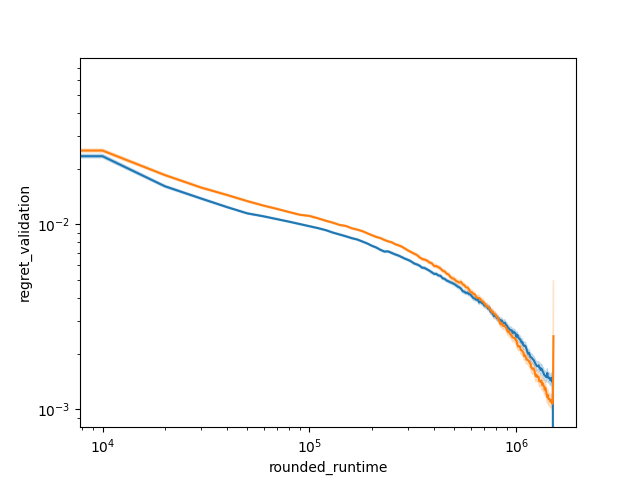

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

info_29_dfs['rounded_runtime'] = info_29_dfs['runtime'].round(decimals=-4)
arch_29_dfs['rounded_runtime'] = arch_29_dfs['runtime'].round(decimals=-4)

plt.figure()
sns.lineplot(data=info_29_dfs, x='rounded_runtime', y='regret_validation')
sns.lineplot(data=arch_29_dfs, x='rounded_runtime', y='regret_validation')

plt.xscale('log')
plt.yscale('log')
plt.show()

<IPython.core.display.Javascript object>


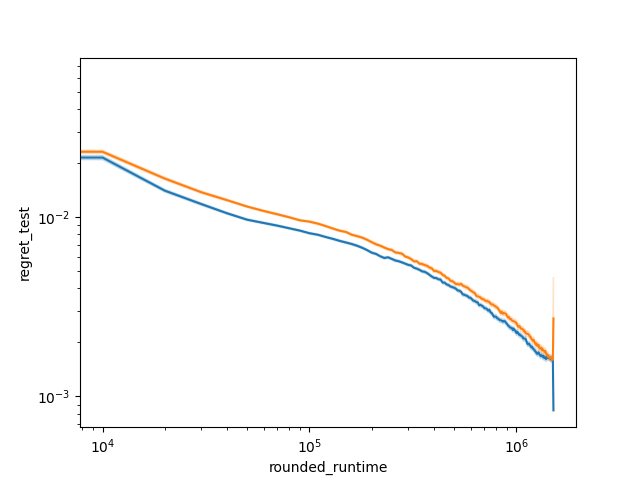

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

info_29_dfs['rounded_runtime'] = info_29_dfs['runtime'].round(decimals=-4)
arch_29_dfs['rounded_runtime'] = arch_29_dfs['runtime'].round(decimals=-4)

plt.figure()
sns.lineplot(data=info_29_dfs, x='rounded_runtime', y='regret_test')
sns.lineplot(data=arch_29_dfs, x='rounded_runtime', y='regret_test')

plt.xscale('log')
plt.yscale('log')
plt.show()